In [ ]:
# Import Libraries and Files
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from tensorflow.keras.layers import LSTM, Dense, Conv1D, LeakyReLU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from pickle import load
import pandas as pd
from tqdm import tqdm
from model_building_5 import (  # Import functions from model_building.py
    make_generator_model,
    make_discriminator_model,
    discriminator_loss,
    generator_loss,
    train_step,
    train,
    eval_op,
    plot_results,
    plot_test_data,
    evaluate_model
)




In [2]:
# imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Conv1D, LeakyReLU
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pickle import load
import pandas as pd
from tqdm import tqdm

In [3]:
# Set the stock name for saving models and plots
stock_name = "AMZN"

In [4]:
# Load the saved datasets
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
yc_train = np.load('yc_train.npy')
yc_test = np.load('yc_test.npy')



In [11]:
# Define input dimensions
input_dim = X_train.shape[1]  # Number of time steps (sequence length)
feature_size = X_train.shape[2]  # Number of features in each time step
output_dim = y_train.shape[1]  # Number of outputs to predict (forecasting horizon)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (207, 5, 15)
X_test shape: (20, 5, 15)
y_train shape: (207, 1)
y_test shape: (20, 1)


In [ ]:
# Set the learning rate for the optimizers
learning_rate = 5e-4

# Set the number of epochs for training
epochs = 5000


In [ ]:

"""
Initializes the optimizers for the generator and discriminator in a GAN model.

The Adam optimizer is used for both the generator and discriminator, with the same learning rate.

Attributes:
    g_optimizer (tf.keras.optimizers.Adam): Optimizer for the generator.
    d_optimizer (tf.keras.optimizers.Adam): Optimizer for the discriminator.

Args:
    learning_rate (float): The learning rate for the Adam optimizer.
"""
g_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
d_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)



In [ ]:
# Create the generator model
generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])

# Create the discriminator model
discriminator = make_discriminator_model(X_train.shape[1])  # Create the discriminator model

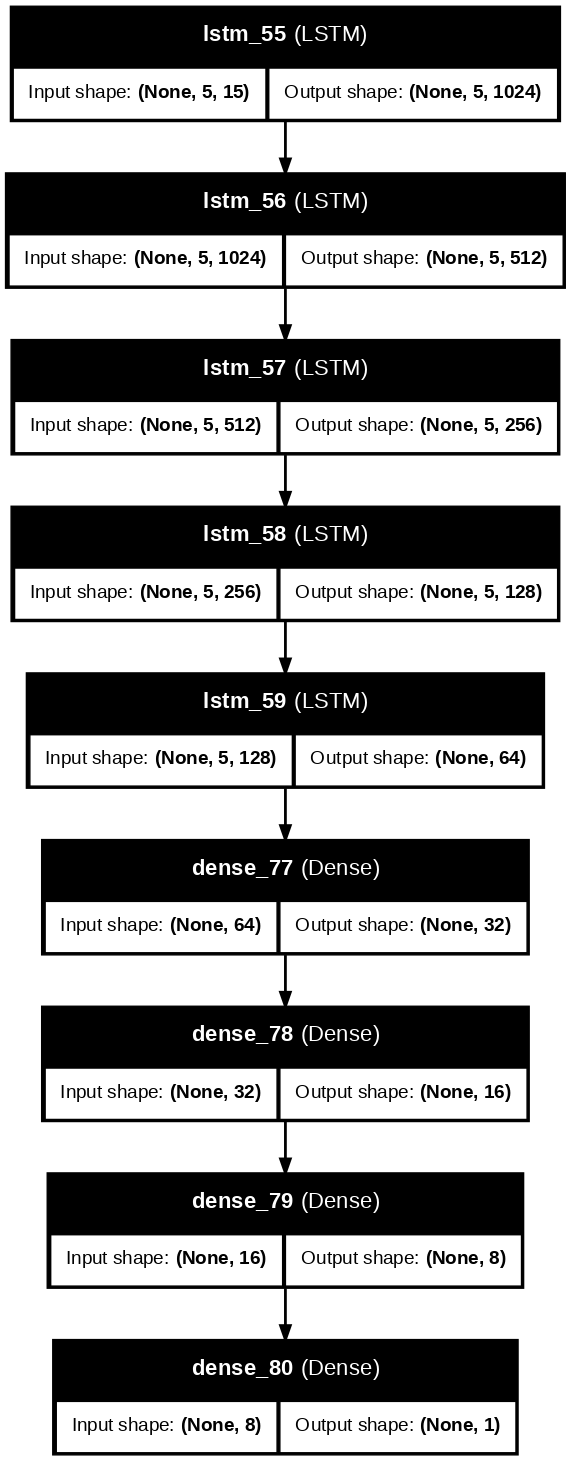

In [ ]:
# Visualize the model architecture
plot_model(generator,
           to_file='generator_keras_model.png',  # Output file
           show_shapes=True,                         # Show input/output shapes
           show_layer_names=True,                    # Show layer names
           dpi=100)

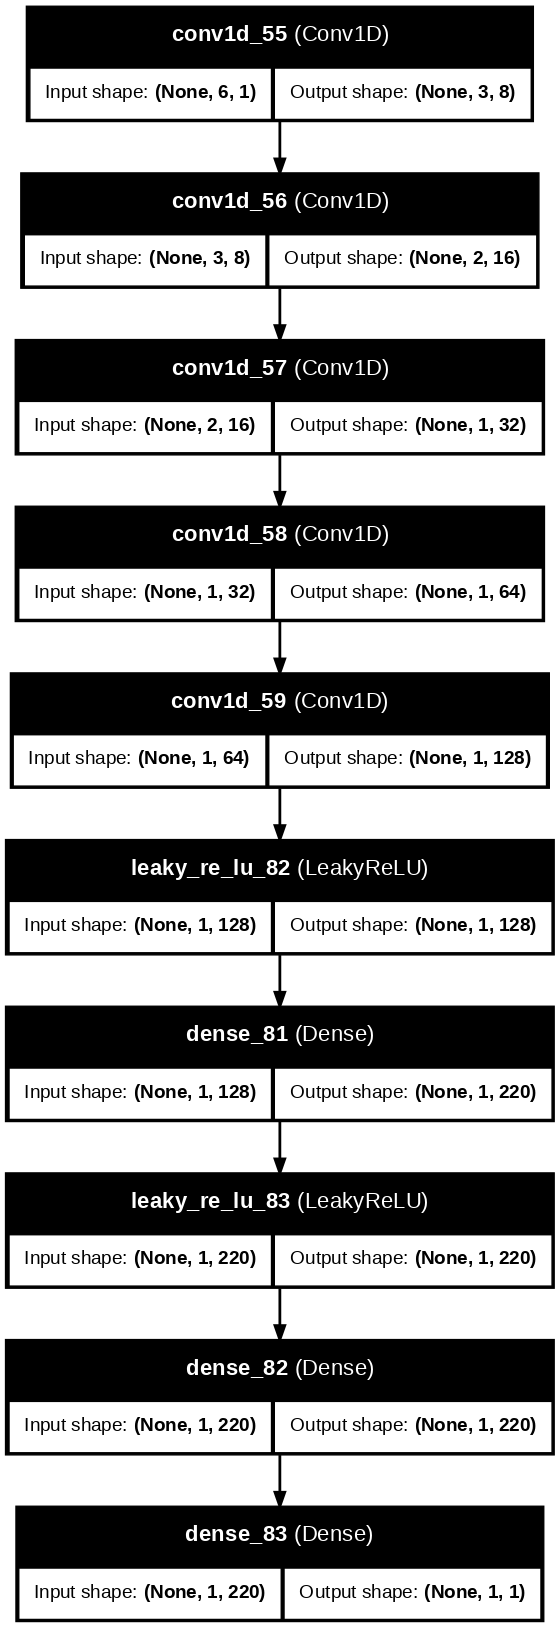

In [ ]:
# Visualize the model architecture
plot_model(discriminator,
           to_file='discriminator_keras_model.png',  # Output file
           show_shapes=True,                         # Show input/output shapes
           show_layer_names=True,                    # Show layer names
           dpi=100)

  1%|          | 52/5000 [00:15<05:24, 15.27it/s]

epoch 50 discriminator_loss 1.3787203 generator_loss 0.7485261


  2%|▏         | 103/5000 [00:19<05:44, 14.23it/s]

epoch 100 discriminator_loss 1.3898742 generator_loss 0.6876216


  3%|▎         | 153/5000 [00:21<04:53, 16.53it/s]

epoch 150 discriminator_loss 1.3865957 generator_loss 0.6929156


  4%|▍         | 203/5000 [00:24<05:01, 15.89it/s]

epoch 200 discriminator_loss 1.3875456 generator_loss 0.69424033


  5%|▌         | 254/5000 [00:27<04:52, 16.24it/s]

epoch 250 discriminator_loss 1.386488 generator_loss 0.6971085


  6%|▌         | 301/5000 [00:29<08:11,  9.55it/s]

epoch 300 discriminator_loss 1.3838074 generator_loss 0.6938302


  7%|▋         | 352/5000 [00:32<05:14, 14.77it/s]

epoch 350 discriminator_loss 1.3862824 generator_loss 0.69595724


  8%|▊         | 403/5000 [00:35<04:43, 16.20it/s]

epoch 400 discriminator_loss 1.3836948 generator_loss 0.69509387


  9%|▉         | 452/5000 [00:38<04:48, 15.77it/s]

epoch 450 discriminator_loss 1.3876975 generator_loss 0.6920809


 10%|█         | 504/5000 [00:40<04:49, 15.51it/s]

epoch 500 discriminator_loss 1.3869523 generator_loss 0.6926684


 11%|█         | 552/5000 [00:44<06:11, 11.98it/s]

epoch 550 discriminator_loss 1.3866934 generator_loss 0.6933868


 12%|█▏        | 602/5000 [00:46<04:32, 16.16it/s]

epoch 600 discriminator_loss 1.3865227 generator_loss 0.69302475


 13%|█▎        | 652/5000 [00:49<04:49, 14.99it/s]

epoch 650 discriminator_loss 1.3865573 generator_loss 0.69369835


 14%|█▍        | 703/5000 [00:52<04:15, 16.81it/s]

epoch 700 discriminator_loss 1.3864207 generator_loss 0.6935289


 15%|█▌        | 752/5000 [00:54<06:01, 11.75it/s]

epoch 750 discriminator_loss 1.3860407 generator_loss 0.69253707


 16%|█▌        | 804/5000 [00:58<04:20, 16.09it/s]

epoch 800 discriminator_loss 1.3858287 generator_loss 0.6929189


 17%|█▋        | 852/5000 [01:00<04:32, 15.20it/s]

epoch 850 discriminator_loss 1.3872669 generator_loss 0.69092053


 18%|█▊        | 902/5000 [01:03<04:25, 15.43it/s]

epoch 900 discriminator_loss 1.3852432 generator_loss 0.69473404


 19%|█▉        | 953/5000 [01:05<04:10, 16.15it/s]

epoch 950 discriminator_loss 1.3861678 generator_loss 0.6926531


 20%|██        | 1001/5000 [01:08<06:46,  9.83it/s]

epoch 1000 discriminator_loss 1.3864522 generator_loss 0.69286585


 21%|██        | 1052/5000 [01:11<04:20, 15.14it/s]

epoch 1050 discriminator_loss 1.3866917 generator_loss 0.693369


 22%|██▏       | 1102/5000 [01:14<03:59, 16.25it/s]

epoch 1100 discriminator_loss 1.3862422 generator_loss 0.69286865


 23%|██▎       | 1153/5000 [01:17<03:53, 16.45it/s]

epoch 1150 discriminator_loss 1.3859934 generator_loss 0.6946429


 24%|██▍       | 1202/5000 [01:19<04:19, 14.63it/s]

epoch 1200 discriminator_loss 1.3866161 generator_loss 0.694287


 25%|██▌       | 1253/5000 [01:23<04:05, 15.28it/s]

epoch 1250 discriminator_loss 1.3859432 generator_loss 0.69196844


 26%|██▌       | 1302/5000 [01:25<03:49, 16.12it/s]

epoch 1300 discriminator_loss 1.3862473 generator_loss 0.69336367


 27%|██▋       | 1353/5000 [01:28<03:38, 16.68it/s]

epoch 1350 discriminator_loss 1.3860512 generator_loss 0.69294584


 28%|██▊       | 1404/5000 [01:31<03:41, 16.22it/s]

epoch 1400 discriminator_loss 1.3867307 generator_loss 0.69242173


 29%|██▉       | 1452/5000 [01:34<05:35, 10.57it/s]

epoch 1450 discriminator_loss 1.3865057 generator_loss 0.69301975


 30%|███       | 1504/5000 [01:37<03:28, 16.80it/s]

epoch 1500 discriminator_loss 1.3866177 generator_loss 0.69307315


 31%|███       | 1552/5000 [01:39<03:46, 15.24it/s]

epoch 1550 discriminator_loss 1.3862278 generator_loss 0.6928261


 32%|███▏      | 1604/5000 [01:42<03:25, 16.56it/s]

epoch 1600 discriminator_loss 1.386384 generator_loss 0.69314474


 33%|███▎      | 1652/5000 [01:44<03:40, 15.20it/s]

epoch 1650 discriminator_loss 1.3861685 generator_loss 0.69213754


 34%|███▍      | 1703/5000 [01:48<04:12, 13.04it/s]

epoch 1700 discriminator_loss 1.3862958 generator_loss 0.6934684


 35%|███▌      | 1752/5000 [01:50<03:18, 16.39it/s]

epoch 1750 discriminator_loss 1.3862684 generator_loss 0.6932005


 36%|███▌      | 1802/5000 [01:53<03:47, 14.07it/s]

epoch 1800 discriminator_loss 1.3868299 generator_loss 0.69479847


 37%|███▋      | 1852/5000 [01:56<03:18, 15.86it/s]

epoch 1850 discriminator_loss 1.386244 generator_loss 0.6926683


 38%|███▊      | 1902/5000 [01:58<04:18, 11.99it/s]

epoch 1900 discriminator_loss 1.3863937 generator_loss 0.6927369


 39%|███▉      | 1952/5000 [02:01<03:08, 16.19it/s]

epoch 1950 discriminator_loss 1.384325 generator_loss 0.6942281


 40%|████      | 2002/5000 [02:04<03:12, 15.54it/s]

epoch 2000 discriminator_loss 1.3864236 generator_loss 0.69196343


 41%|████      | 2052/5000 [02:07<03:09, 15.57it/s]

epoch 2050 discriminator_loss 1.3861783 generator_loss 0.69298875


 42%|████▏     | 2101/5000 [02:09<03:05, 15.67it/s]

epoch 2100 discriminator_loss 1.3866234 generator_loss 0.6928026


 43%|████▎     | 2151/5000 [02:12<04:57,  9.58it/s]

epoch 2150 discriminator_loss 1.3844736 generator_loss 0.69150275


 44%|████▍     | 2204/5000 [02:15<02:45, 16.92it/s]

epoch 2200 discriminator_loss 1.3865242 generator_loss 0.69262785


 45%|████▌     | 2252/5000 [02:18<02:53, 15.88it/s]

epoch 2250 discriminator_loss 1.3863294 generator_loss 0.69285744


 46%|████▌     | 2303/5000 [02:20<02:40, 16.83it/s]

epoch 2300 discriminator_loss 1.3862388 generator_loss 0.69382584


 47%|████▋     | 2352/5000 [02:23<03:03, 14.40it/s]

epoch 2350 discriminator_loss 1.3863794 generator_loss 0.69212246


 48%|████▊     | 2403/5000 [02:26<02:47, 15.49it/s]

epoch 2400 discriminator_loss 1.3857211 generator_loss 0.6923317


 49%|████▉     | 2452/5000 [02:29<02:47, 15.20it/s]

epoch 2450 discriminator_loss 1.3860235 generator_loss 0.69293445


 50%|█████     | 2504/5000 [02:32<02:28, 16.86it/s]

epoch 2500 discriminator_loss 1.386658 generator_loss 0.69343615


 51%|█████     | 2551/5000 [02:34<02:54, 14.03it/s]

epoch 2550 discriminator_loss 1.3869709 generator_loss 0.69417334


 52%|█████▏    | 2602/5000 [02:38<03:54, 10.24it/s]

epoch 2600 discriminator_loss 1.3866329 generator_loss 0.69387907


 53%|█████▎    | 2654/5000 [02:41<02:19, 16.81it/s]

epoch 2650 discriminator_loss 1.3860966 generator_loss 0.69288


 54%|█████▍    | 2701/5000 [02:43<02:38, 14.47it/s]

epoch 2700 discriminator_loss 1.3864105 generator_loss 0.69323575


 55%|█████▌    | 2753/5000 [02:46<02:17, 16.31it/s]

epoch 2750 discriminator_loss 1.3862811 generator_loss 0.6935733


 56%|█████▌    | 2801/5000 [02:49<02:55, 12.55it/s]

epoch 2800 discriminator_loss 1.3862065 generator_loss 0.6931842


 57%|█████▋    | 2851/5000 [02:52<02:29, 14.38it/s]

epoch 2850 discriminator_loss 1.3863087 generator_loss 0.6926311


 58%|█████▊    | 2902/5000 [02:54<02:15, 15.47it/s]

epoch 2900 discriminator_loss 1.3863266 generator_loss 0.69310445


 59%|█████▉    | 2953/5000 [02:57<02:03, 16.60it/s]

epoch 2950 discriminator_loss 1.3862336 generator_loss 0.69251215


 60%|██████    | 3002/5000 [03:00<02:17, 14.55it/s]

epoch 3000 discriminator_loss 1.3783982 generator_loss 0.6929002


 61%|██████    | 3051/5000 [03:03<03:33,  9.15it/s]

epoch 3050 discriminator_loss 1.3861909 generator_loss 0.6949922


 62%|██████▏   | 3102/5000 [03:06<02:00, 15.77it/s]

epoch 3100 discriminator_loss 1.3864162 generator_loss 0.6906445


 63%|██████▎   | 3152/5000 [03:08<01:58, 15.65it/s]

epoch 3150 discriminator_loss 1.3892096 generator_loss 0.70945215


 64%|██████▍   | 3204/5000 [03:11<01:46, 16.88it/s]

epoch 3200 discriminator_loss 1.3835917 generator_loss 0.704137


 65%|██████▌   | 3252/5000 [03:13<01:48, 16.07it/s]

epoch 3250 discriminator_loss 1.3865025 generator_loss 0.6916404


 66%|██████▌   | 3302/5000 [03:17<01:59, 14.16it/s]

epoch 3300 discriminator_loss 1.3860514 generator_loss 0.6951393


 67%|██████▋   | 3354/5000 [03:20<01:36, 17.01it/s]

epoch 3350 discriminator_loss 1.3871564 generator_loss 0.69009334


 68%|██████▊   | 3402/5000 [03:22<01:52, 14.15it/s]

epoch 3400 discriminator_loss 1.3863595 generator_loss 0.69378936


 69%|██████▉   | 3453/5000 [03:25<01:32, 16.70it/s]

epoch 3450 discriminator_loss 1.3863766 generator_loss 0.69415975


 70%|███████   | 3501/5000 [03:28<02:30,  9.97it/s]

epoch 3500 discriminator_loss 1.3864039 generator_loss 0.69538474


 71%|███████   | 3553/5000 [03:31<01:35, 15.14it/s]

epoch 3550 discriminator_loss 1.3861818 generator_loss 0.6915541


 72%|███████▏  | 3604/5000 [03:33<01:23, 16.70it/s]

epoch 3600 discriminator_loss 1.3864183 generator_loss 0.69165117


 73%|███████▎  | 3653/5000 [03:36<01:29, 15.01it/s]

epoch 3650 discriminator_loss 1.3871269 generator_loss 0.6949044


 74%|███████▍  | 3702/5000 [03:39<01:24, 15.35it/s]

epoch 3700 discriminator_loss 1.386891 generator_loss 0.6944969


 75%|███████▌  | 3753/5000 [03:42<01:35, 13.04it/s]

epoch 3750 discriminator_loss 1.3860474 generator_loss 0.6919553


 76%|███████▌  | 3802/5000 [03:45<01:17, 15.48it/s]

epoch 3800 discriminator_loss 1.3865602 generator_loss 0.6927622


 77%|███████▋  | 3853/5000 [03:47<01:15, 15.12it/s]

epoch 3850 discriminator_loss 1.386514 generator_loss 0.6939929


 78%|███████▊  | 3902/5000 [03:50<01:13, 14.97it/s]

epoch 3900 discriminator_loss 1.3857057 generator_loss 0.69416213


 79%|███████▉  | 3952/5000 [03:53<01:34, 11.05it/s]

epoch 3950 discriminator_loss 1.3867621 generator_loss 0.69145423


 80%|████████  | 4002/5000 [03:56<01:02, 15.97it/s]

epoch 4000 discriminator_loss 1.386462 generator_loss 0.6926385


 81%|████████  | 4052/5000 [03:59<01:02, 15.26it/s]

epoch 4050 discriminator_loss 1.386487 generator_loss 0.6935142


 82%|████████▏ | 4104/5000 [04:01<00:58, 15.36it/s]

epoch 4100 discriminator_loss 1.3864039 generator_loss 0.69257164


 83%|████████▎ | 4152/5000 [04:04<00:56, 14.98it/s]

epoch 4150 discriminator_loss 1.3863492 generator_loss 0.6935143


 84%|████████▍ | 4204/5000 [04:08<01:03, 12.45it/s]

epoch 4200 discriminator_loss 1.386168 generator_loss 0.6922736


 85%|████████▌ | 4252/5000 [04:10<00:49, 15.16it/s]

epoch 4250 discriminator_loss 1.3861914 generator_loss 0.6938801


 86%|████████▌ | 4302/5000 [04:13<00:47, 14.80it/s]

epoch 4300 discriminator_loss 1.3861777 generator_loss 0.6930238


 87%|████████▋ | 4354/5000 [04:16<00:40, 16.06it/s]

epoch 4350 discriminator_loss 1.3862774 generator_loss 0.6932256


 88%|████████▊ | 4401/5000 [04:18<00:59, 10.05it/s]

epoch 4400 discriminator_loss 1.3862605 generator_loss 0.6932243


 89%|████████▉ | 4454/5000 [04:22<00:36, 14.78it/s]

epoch 4450 discriminator_loss 1.3862908 generator_loss 0.69341797


 90%|█████████ | 4502/5000 [04:24<00:31, 15.75it/s]

epoch 4500 discriminator_loss 1.3862791 generator_loss 0.6931741


 91%|█████████ | 4552/5000 [04:27<00:30, 14.86it/s]

epoch 4550 discriminator_loss 1.3862641 generator_loss 0.69315594


 92%|█████████▏| 4604/5000 [04:30<00:25, 15.53it/s]

epoch 4600 discriminator_loss 1.3862748 generator_loss 0.6930848


 93%|█████████▎| 4653/5000 [04:33<00:30, 11.41it/s]

epoch 4650 discriminator_loss 1.3862792 generator_loss 0.6931007


 94%|█████████▍| 4702/5000 [04:36<00:20, 14.86it/s]

epoch 4700 discriminator_loss 1.3862551 generator_loss 0.692987


 95%|█████████▌| 4752/5000 [04:39<00:16, 14.71it/s]

epoch 4750 discriminator_loss 1.3862418 generator_loss 0.693176


 96%|█████████▌| 4804/5000 [04:41<00:12, 15.99it/s]

epoch 4800 discriminator_loss 1.3862393 generator_loss 0.69329685


 97%|█████████▋| 4852/5000 [04:44<00:13, 11.18it/s]

epoch 4850 discriminator_loss 1.3861982 generator_loss 0.69339186


 98%|█████████▊| 4904/5000 [04:48<00:06, 14.97it/s]

epoch 4900 discriminator_loss 1.3865916 generator_loss 0.6936765


 99%|█████████▉| 4954/5000 [04:50<00:02, 16.24it/s]

epoch 4950 discriminator_loss 1.3861562 generator_loss 0.69321245


100%|██████████| 5000/5000 [04:53<00:00, 17.04it/s]

epoch 5000 discriminator_loss 1.3868082 generator_loss 0.69035214


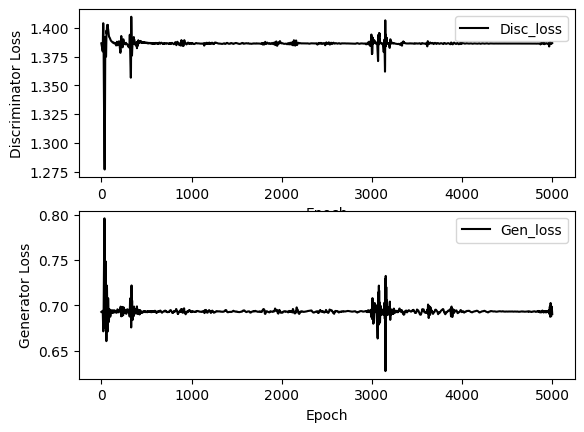

In [ ]:
# Train the GAN model and get the predicted price, real price, and RMSPE
predicted_price, real_price, RMSPE = train(X_train, y_train, yc_train, epochs, generator, discriminator, g_optimizer, d_optimizer)

# test_generator = tf.keras.models.load_model(f'./models_gan/{stock_name}/generator_V_{epochs-1}.h5')

In [42]:
test_generator = tf.keras.models.load_model(f'/content/generator_V_4999.keras')

In [43]:
# Load index files
index_train = np.load('index_train.npy', allow_pickle=True)  # Load training index data
index_test = np.load('index_test.npy', allow_pickle=True)  # Load testing index data

# Print the first few entries for verification
print(f"index_train: {index_train[:5]}")  # Print the first few entries of training index
print(f"index_test: {index_test[:5]}")  # Print the first few entries of testing index


index_train: ['2021-11-04T00:00:00.000000000' '2021-11-05T00:00:00.000000000'
 '2021-11-08T00:00:00.000000000' '2021-11-09T00:00:00.000000000'
 '2021-11-10T00:00:00.000000000']
index_test: ['2022-09-01T00:00:00.000000000' '2022-09-02T00:00:00.000000000'
 '2022-09-06T00:00:00.000000000' '2022-09-07T00:00:00.000000000'
 '2022-09-08T00:00:00.000000000']


Test RMSE:  10.317513596407446


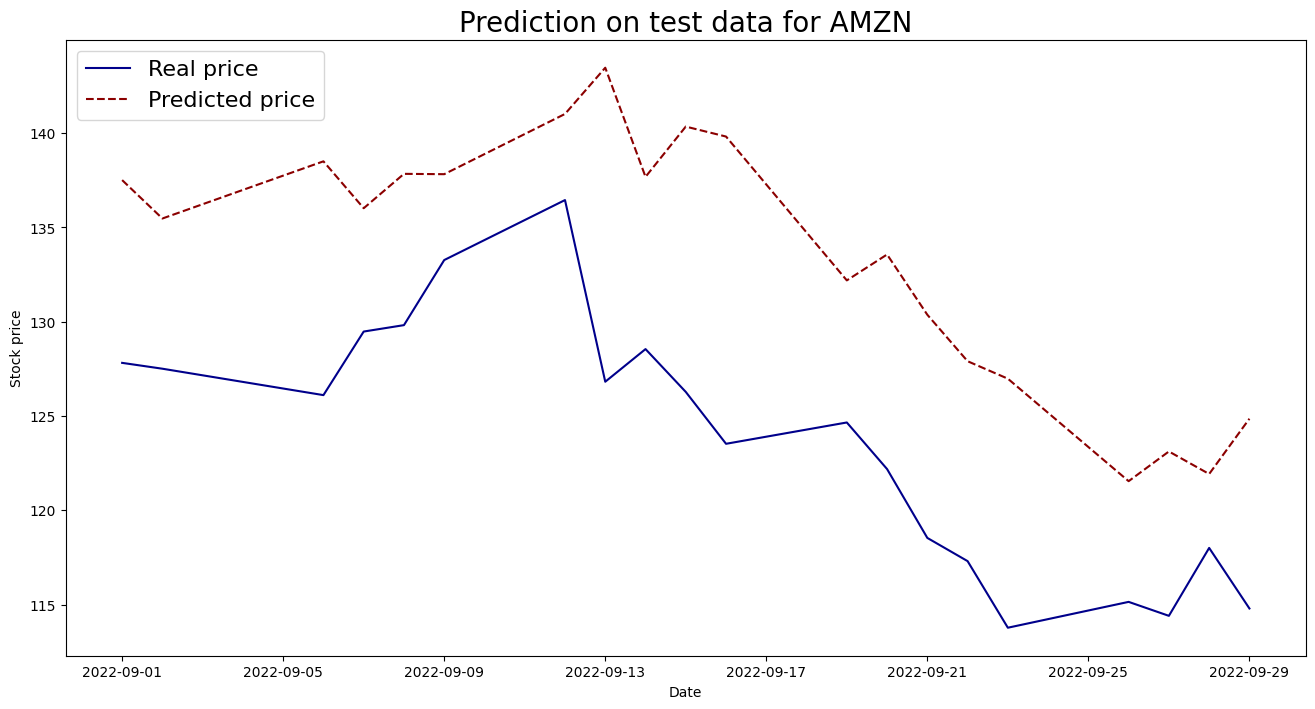

In [44]:
# Evaluate the test data using the trained generator model
predicted_test_data = eval_op(test_generator, X_test)

# Plot the actual vs predicted test data
plot_test_data(y_test, predicted_test_data, index_test)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score

In [53]:
# Predict test data
predicted_test_data = eval_op(test_generator, X_test)

# Evaluate the model
evaluation_metrics = evaluate_model(test_generator, y_test, predicted_test_data, index_test)

# Access metrics if needed
mse = evaluation_metrics["MSE"]
mape = evaluation_metrics["MAPE"]
rmse = evaluation_metrics["RMSE"]


Mean Squared Error (MSE): 106.4511
Mean Absolute Percentage Error (MAPE): 0.0787
Root Mean Squared Error (RMSE): 10.3175
